In [1]:
%matplotlib qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mne
import os.path as op

In [2]:
mne.set_log_level('warning')

In [48]:
data_path = op.expanduser("D:/Research/Academic/PhD/Perception/Data/")
raw_fname = op.join(data_path, 'Victor/190711/victor_percep_tsss.fif')

In [49]:
print(raw_fname)

D:/Research/Academic/PhD/Perception/Data/Victor/190711/victor_percep_tsss.fif


In [50]:
raw = mne.io.read_raw_fif(raw_fname, preload=False)
print(raw)

<Raw  |  victor_percep_tsss.fif, n_channels x n_times : 320 x 1102000 (1102.0 sec), ~5.7 MB, data not loaded>


<ipython-input-50-c815df92f23e>:1: RuntimeWarning: This filename (D:/Research/Academic/PhD/Perception/Data/Victor/190711/victor_percep_tsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(raw_fname, preload=False)


In [51]:
print(raw.info)

<Info | 27 non-empty fields
    acq_pars : str | 20504 items
    bads : list | 0 items
    ch_names : list | MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, ...
    chs : list | 320 items (GRAD: 204, MAG: 102, EOG: 1, ECG: 1, STIM: 3, CHPI: 9)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 17 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 443 items (3 Cardinal, 4 HPI, 436 Extra)
    events : list | 1 items
    experimenter : str | 33 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    hpi_subsystem : dict | 2 items
    line_freq : float | 50.0
    lowpass : float | 330.0 Hz
    meas_date : tuple | 2019-07-11 08:02:47 GMT
    meas_id : dict | 4 items
    nchan : int | 320
    proc_history : list | 1 items
    proj_id : ndarray | 1 items
    proj_name : str | 9 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
  

In [52]:
channel_type = mne.io.pick.channel_type(raw.info, 75)
print("Channel #75 is of type:", channel_type)

channel_type = mne.io.pick.channel_type(raw.info, 300)
print("Channel #300 is of type:", channel_type)

Channel #75 is of type: grad
Channel #300 is of type: grad


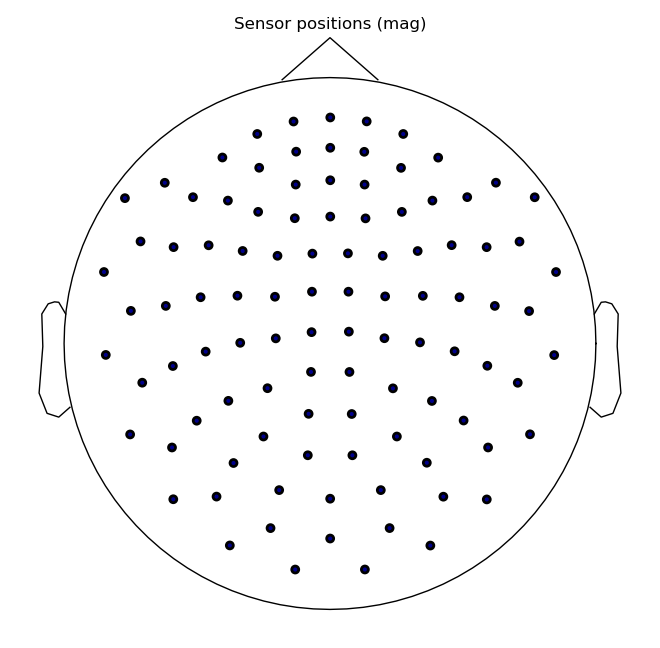

In [53]:
raw.plot_sensors(kind='topomap', ch_type='mag')

In [54]:
raw.load_data()

<Raw  |  victor_percep_tsss.fif, n_channels x n_times : 320 x 1102000 (1102.0 sec), ~2.63 GB, data loaded>

In [55]:
to_drop = ['STI201', 'STI301', 'CHPI001', 'CHPI002', 'CHPI003',
           'CHPI004', 'CHPI005', 'CHPI006', 'CHPI007', 'CHPI008', 'CHPI009']

In [56]:
raw.drop_channels(to_drop)

<Raw  |  victor_percep_tsss.fif, n_channels x n_times : 309 x 1102000 (1102.0 sec), ~2.54 GB, data loaded>

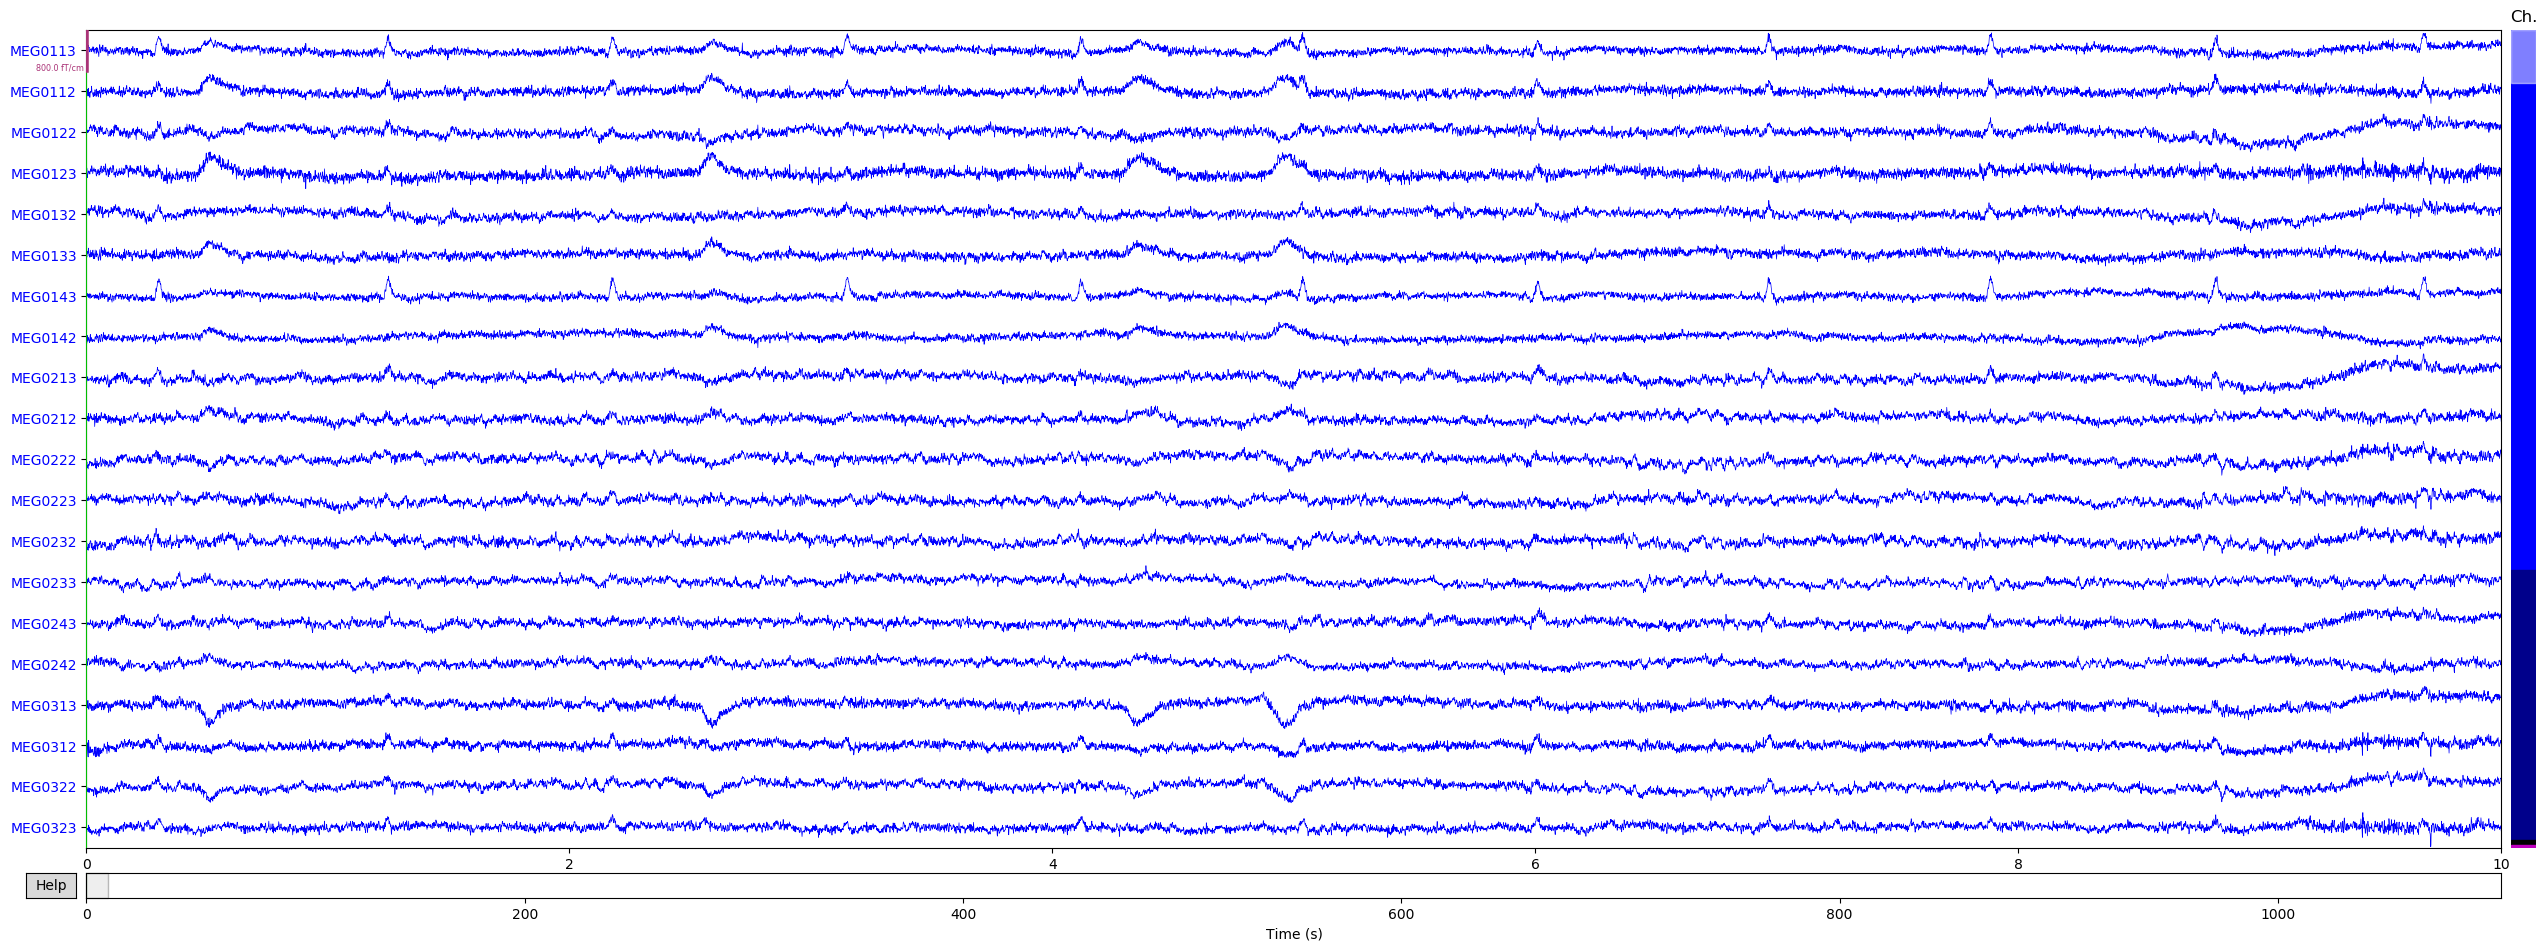

In [59]:
raw.plot()

In [60]:
raw.annotations

<Annotations  |  8 segments : BAD_disturbance (8), orig_time : 2019-07-11 08:02:47.639091>

In [61]:
raw.annotations.save('annot.csv')

In [62]:
raw.filter(0, 40)

<Raw  |  victor_percep_tsss.fif, n_channels x n_times : 309 x 1102000 (1102.0 sec), ~2.54 GB, data loaded>

In [63]:
d = raw.get_data(picks=('grad',))
np.max(d)

9.783870893223126e-11

In [64]:
start = 0
stop = int(50 * raw.info['sfreq'])
data = raw.get_data('STI101', start=start, stop=stop)
data.shape

(1, 50000)

In [65]:
raw.times[start:stop].shape

(50000,)

In [66]:
plt.plot(raw.times[start:stop], data.T)

In [67]:
events = mne.find_events(raw, stim_channel='STI101', verbose=True)

Trigger channel has a non-zero initial value of 40 (consider using initial_event=True to detect this event)
45 events found
Event IDs: [ 15  43  62  70  86  90  92  94 126]


In [68]:
events.shape

(45, 3)

In [69]:
events

array([[  45920,      40,      43],
       [ 165930,      11,      15],
       [ 205987,      12,      92],
       [ 211015,      80,      90],
       [ 221027,      80,      90],
       [ 231057,      80,      90],
       [ 241087,      80,      90],
       [ 251118,      80,      90],
       [ 261148,      80,      90],
       [ 271178,      80,      90],
       [ 281208,      80,      90],
       [ 291238,      80,      90],
       [ 301252,      80,      90],
       [ 311265,      80,      90],
       [ 321279,      80,      90],
       [ 366302,      90,     126],
       [ 371330,      60,     126],
       [ 376338,      70,     126],
       [ 381343,      60,     126],
       [ 386355,      70,     126],
       [ 391373,      60,     126],
       [ 396381,      70,     126],
       [ 401387,      60,      70],
       [ 406399,      70,     126],
       [ 411417,      60,     126],
       [ 416429,      70,     126],
       [ 421447,      60,     126],
       [ 426464,      70,   